In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle   

In [2]:
# Loaded the dataset
data = pd.read_excel('C:/Users/Saurav/Downloads/dataset_limbah_cair_industri.xlsx')


In [3]:
data.head

<bound method NDFrame.head of           Date        pH  Conductivity (µS/cm)  Turbidity (NTU)  TSS (mg/L)  \
0   2023-01-01  7.824837           3286.608316       134.570670   78.434733   
1   2023-01-02  6.967042           3503.260203        95.932259  186.390429   
2   2023-01-03  7.056708           3079.685204       136.644753  295.192160   
3   2023-01-04  7.255504           1280.353535       147.967093   70.486625   
4   2023-01-05  6.759388           4686.475402       108.743526  219.677719   
..         ...       ...                   ...              ...         ...   
360 2023-12-27  6.539880           4038.019506       148.997257  186.634289   
361 2023-12-28  6.950231           4161.988344        86.178211   72.233402   
362 2023-12-29  6.006742           3276.114395        66.603920   56.742715   
363 2023-12-30  6.661862           3251.302634        95.277023  153.282568   
364 2023-12-31  6.421375           4673.150153        64.877941  100.951873   

     BOD (mg/L)  COD 

In [4]:
# Checking for missing values
print("Checking missing value")
print(data.isnull().sum())


Checking missing value
Date                          0
pH                            0
Conductivity (µS/cm)          0
Turbidity (NTU)               0
TSS (mg/L)                    0
BOD (mg/L)                    0
COD (mg/L)                    0
Total Coliform (MPN/100mL)    0
dtype: int64


In [5]:
# Handled missing values
data = data.dropna()


In [6]:
# Removed non-numeric columns, such as DateTime if present
X = data.select_dtypes(include=['float64', 'int64'])


In [7]:
# Ensured that the target variable (y) is separate
y = data['BOD (mg/L)']

In [8]:
# Dropped the target variable from the feature set
X = X.drop(columns=['BOD (mg/L)'], axis=1)

In [9]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialized the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [11]:
# Trained the model
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [12]:
# Make predictions on the test set
Y_pred = model.predict(X_test)


In [13]:
# Evaluated the model using appropriate regression metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [14]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1172.06
R^2 Score: 0.03


Since typical BOD values are between 0 and 100, an MSE of 1172.06 is very high. R² score of 0.03 indicates that our model explains only 3% of the variability in the BOD dataset. It suggests our model is not performing well and may need improvement !

In [16]:
# Save the model
with open('predict_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model has been trained and saved as predict_model.pkl")

Model has been trained and saved as predict_model.pkl


In [17]:
import matplotlib.pyplot as plt


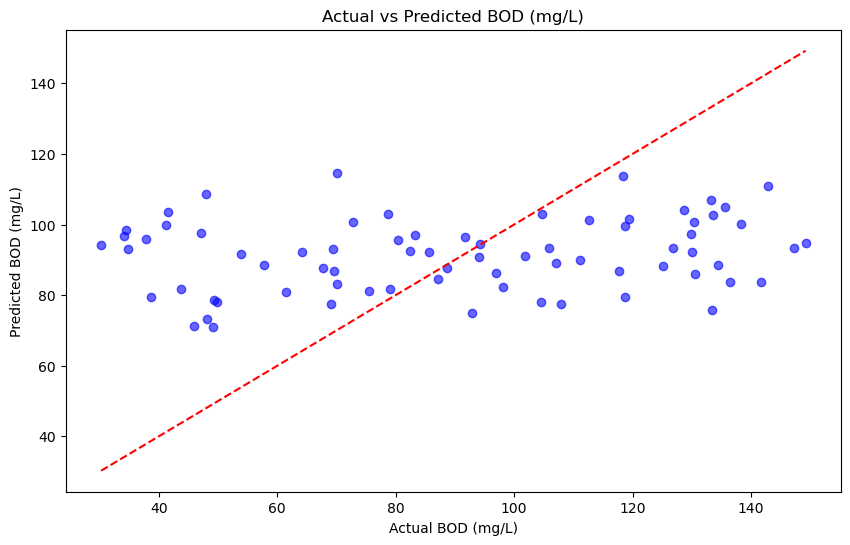

In [19]:
# Scatter Plot of actual vs predicted values
# The red dashed line represents a perfect prediction where predicted equals actual.
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted BOD (mg/L)')
plt.xlabel('Actual BOD (mg/L)')
plt.ylabel('Predicted BOD (mg/L)')
plt.show()

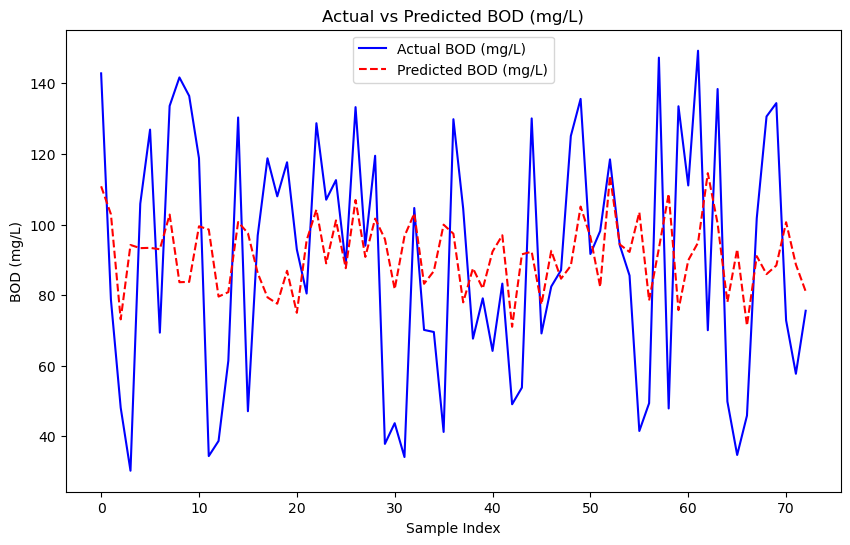

In [20]:
# Line Plot of actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(Y_test.reset_index(drop=True), label='Actual BOD (mg/L)', color='blue')
plt.plot(Y_pred, label='Predicted BOD (mg/L)', color='red', linestyle='--')
plt.title('Actual vs Predicted BOD (mg/L)')
plt.xlabel('Sample Index')
plt.ylabel('BOD (mg/L)')
plt.legend()
plt.show()

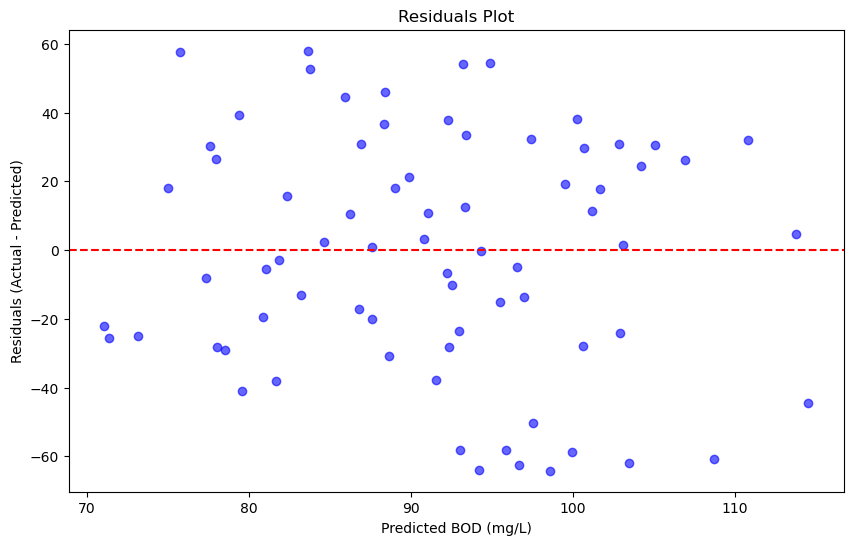

In [22]:
# Calculating residuals
residuals = Y_test - Y_pred

# Plot residuals
plt.figure(figsize=(10,6))
plt.scatter(Y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted BOD (mg/L)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# GB
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, Y_train)
Y_pred = gb_model.predict(X_test)

# Evaluate the model
print(f"Gradient Boosting R^2 Score: {r2_score(Y_test, Y_pred):.2f}")

Gradient Boosting R^2 Score: -0.15


In [32]:
# SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and SVR
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svr', SVR(kernel='rbf', C=100, gamma=0.1))
])

svr_pipeline.fit(X_train, Y_train)
Y_pred = svr_pipeline.predict(X_test)

# Evaluate the model
print(f"SVR R^2 Score: {r2_score(Y_test, Y_pred):.2f}")


SVR R^2 Score: 0.10


In [35]:
# XGBOOST
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred = xgb_model.predict(X_test)

# Evaluate the model
print(f"XGBoost R^2 Score: {r2_score(Y_test, Y_pred):.2f}")

XGBoost R^2 Score: -0.16


In [36]:
# CHOOSING THE BEST MODEL
models = {
    'Random Forest': best_rf_model,
    'Gradient Boosting': gb_model,
    'SVR': svr_pipeline,
    'XGBoost': xgb_model
}

results = {}
for name, model in models.items():
    Y_pred = model.predict(X_test)
    results[name] = {
        'R^2 Score': r2_score(Y_test, Y_pred),
        'MSE': mean_squared_error(Y_test, Y_pred)
    }

for model, metrics in results.items():
    print(f"{model}: R^2 = {metrics['R^2 Score']:.2f}, MSE = {metrics['MSE']:.2f}")

Random Forest: R^2 = 0.06, MSE = 1134.16
Gradient Boosting: R^2 = -0.15, MSE = 1393.42
SVR: R^2 = 0.10, MSE = 1084.94
XGBoost: R^2 = -0.16, MSE = 1405.45


SVR performs slightly better than Random Forest in terms of MSE and R² 